https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

https://www.youtube.com/watch?v=LNwODJXcvt4&list=PLT4ZwFPi5zxFftzI735YoLmq3bFiP2DBo&index=40


Todos:
* Change the next roboflow dataset to have warriors-home, cavs-away, ball to basketball, rim to hoop, and leave referee


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 13.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode-checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 384, in entrypoint
    check_dict_alignment(full_args_dict, {a: ''})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 205, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'mode-checks' is not a valid YOLO argument. Similar arguments are i.e. ['checks=<function collect_system_info at 0x7f1751b220e0>'].

    Arguments received: ['yolo', 'mode-checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override d

In [ ]:
!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="htpcxp3XQh7SsgMfjJns")
#project = rf.workspace("amrita-hlhw6").project("basketball-and-hoop-detection")
#dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="htpcxp3XQh7SsgMfjJns")
project = rf.workspace("basketball-formations").project("warriors-vs-cavs-2016")
dataset = project.version(10).download("yolov8")
#v5 is only basketball, hoop, referee, and people. warriors/cavs need a lot more images annotated


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Warriors-vs-Cavs-2016-10 in yolov8:: 100%|██████████| 16628/16628 [00:02<00:00, 6244.16it/s]


In [ ]:
#use to update yaml file train and val to just train/images because the extra hoop-detection is throwing it off

import yaml

def update_yaml_file(path):
    # Load the yaml file
    with open(path, 'r') as file:
        data_yaml = yaml.safe_load(file)

    # Modify the train and validation paths
    data_yaml['train'] = 'train/images'
    data_yaml['val'] = 'valid/images'

    # Save the modified yaml file back
    with open(path, 'w') as file:
        yaml.dump(data_yaml, file)

# Assuming your data.yaml path is /content/Basketball-and-Hoop-Detection-1/data.yaml
#update_yaml_file('/content/Basketball-and-Hoop-Detection-1/data.yaml')
update_yaml_file('/content/Warriors-vs-Cavs-2016-10/data.yaml')



In [ ]:
#Train Model: select type of model (pose, classification, segmentation, detection), mode=train for custom datasets,
#             location of data.yaml, epoch size, and image size

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 282MB/s]
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Warriors-vs-Cavs-2016-10/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

Look for the different training metrics after:
* confusion matrix
* results
* prediction images





In [ ]:
!ls /content/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1701724491.32124fd49640.2006.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2930.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2931.jpg  weights
P_curve.png					    train_batch2932.jpg
PR_curve.png					    train_batch2.jpg


/content/runs/detect/train


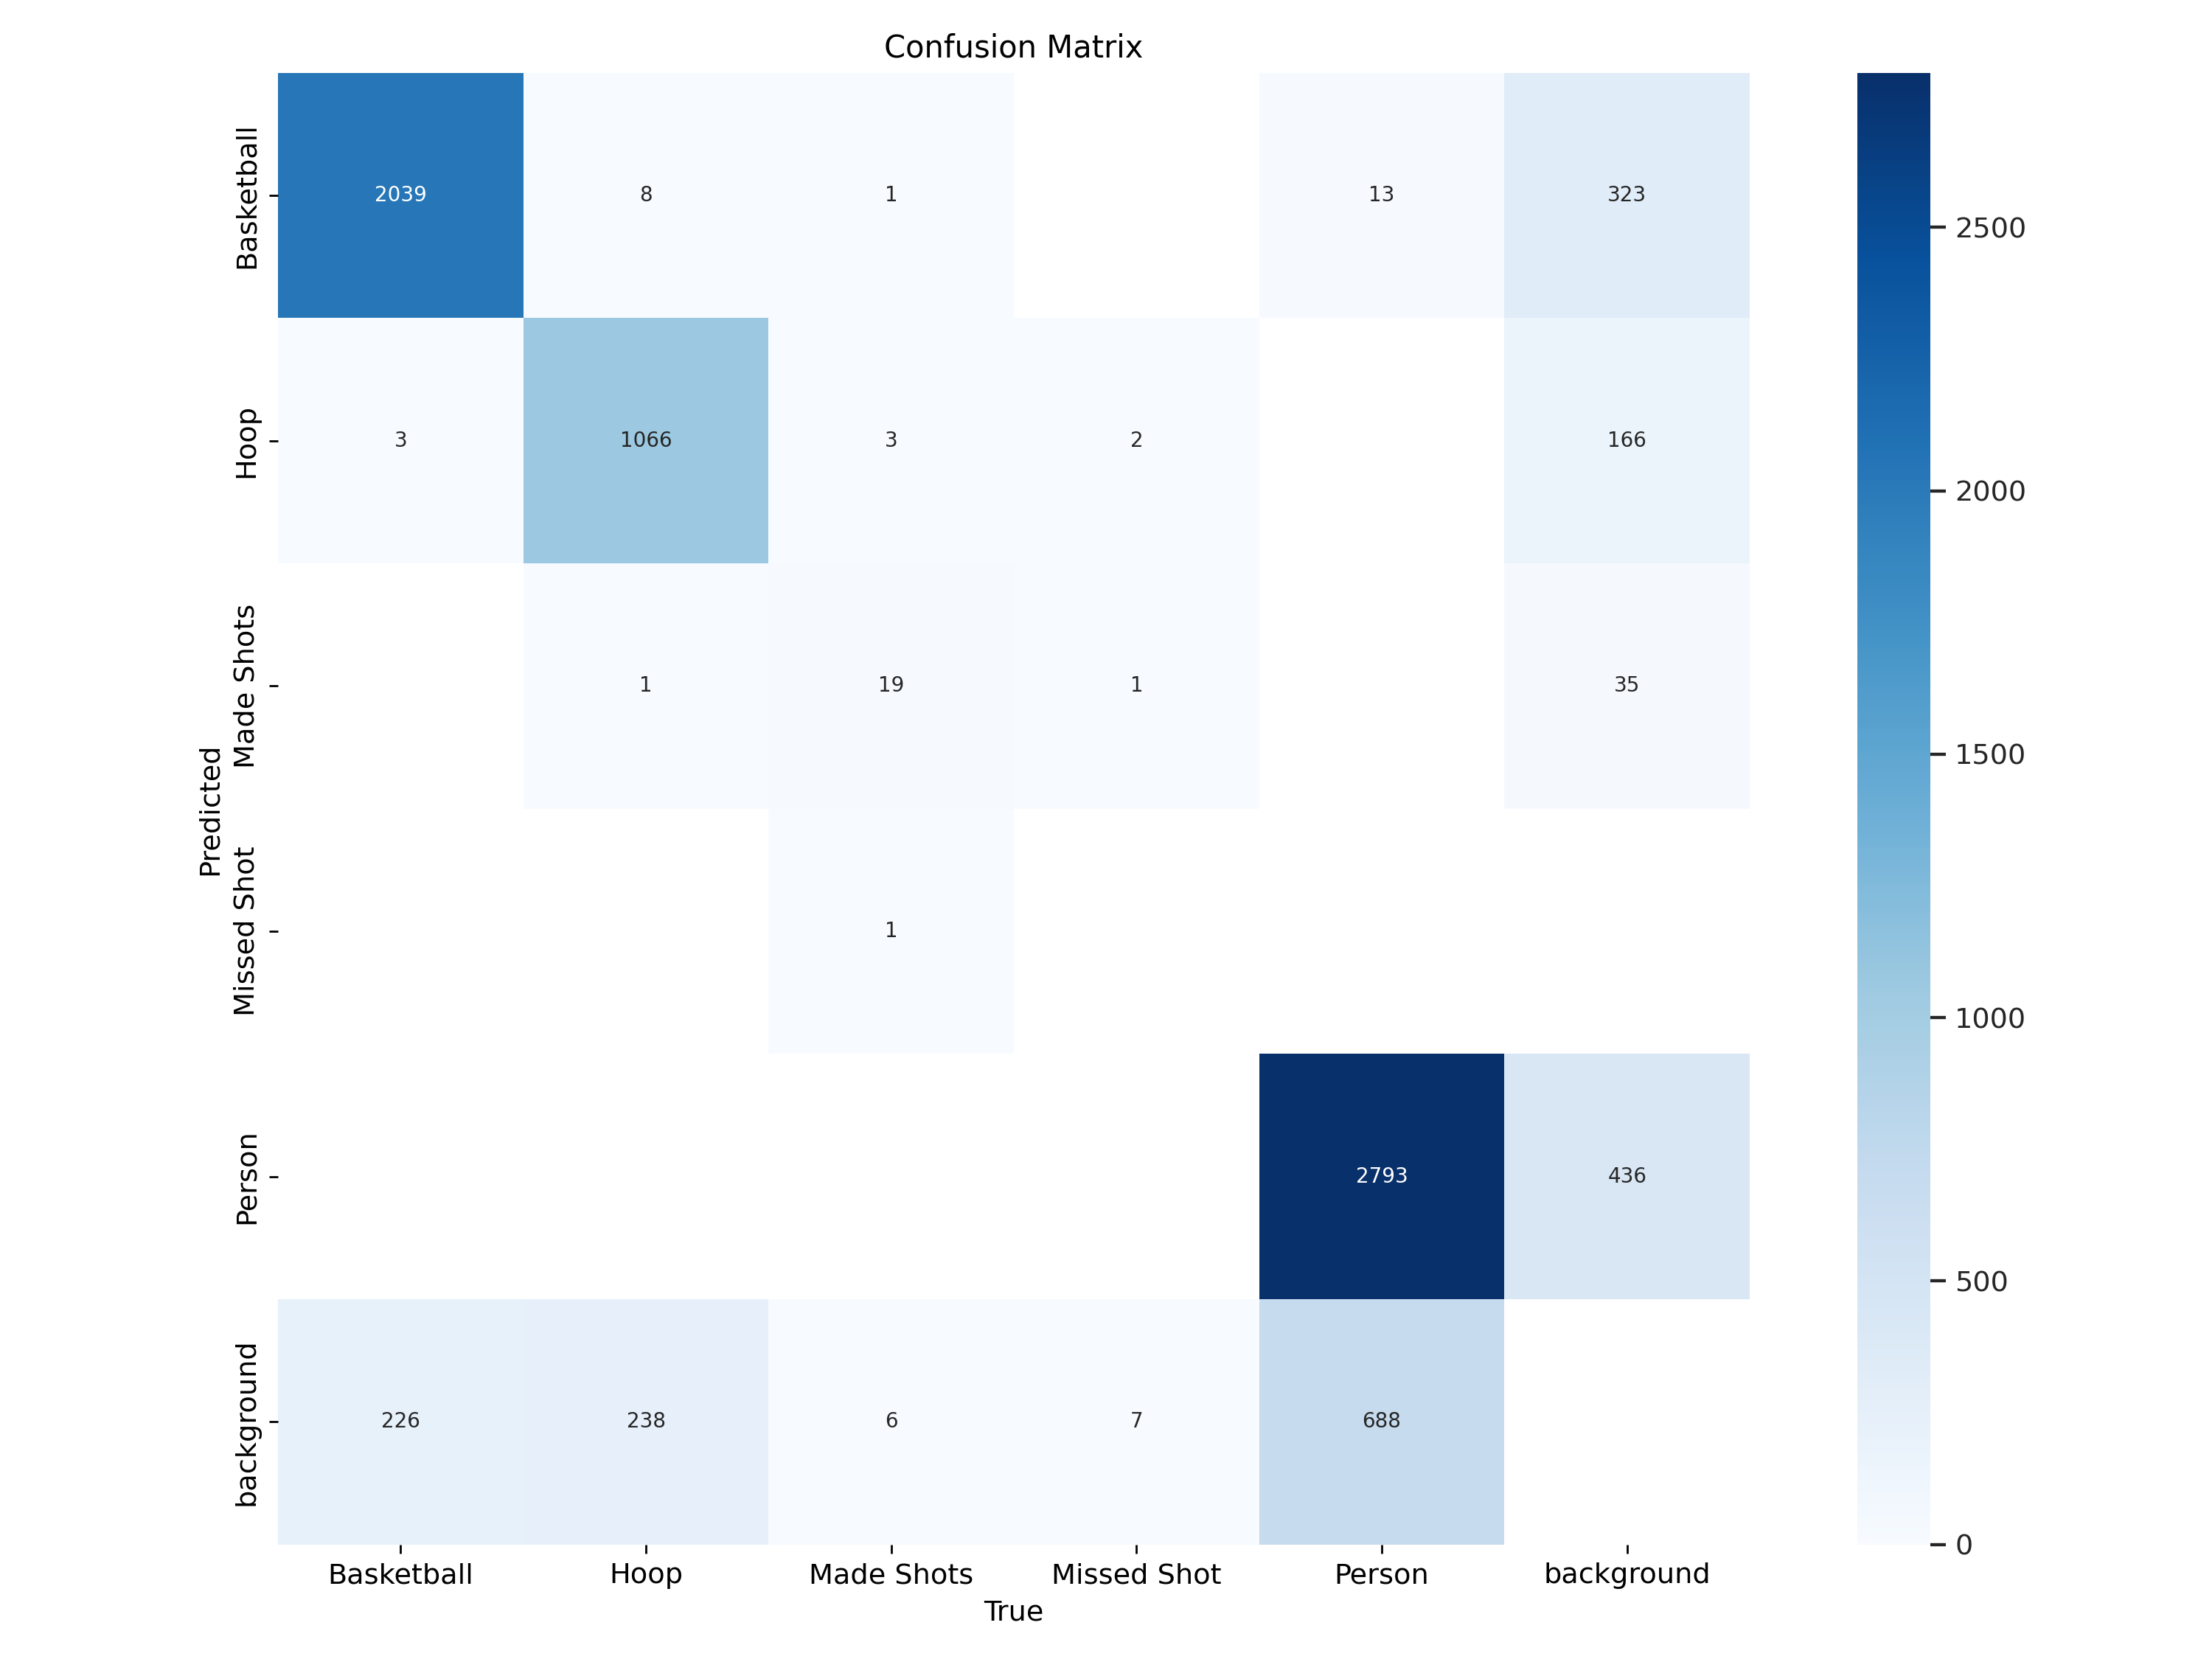

In [ ]:
%cd /content/runs/detect/train/
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


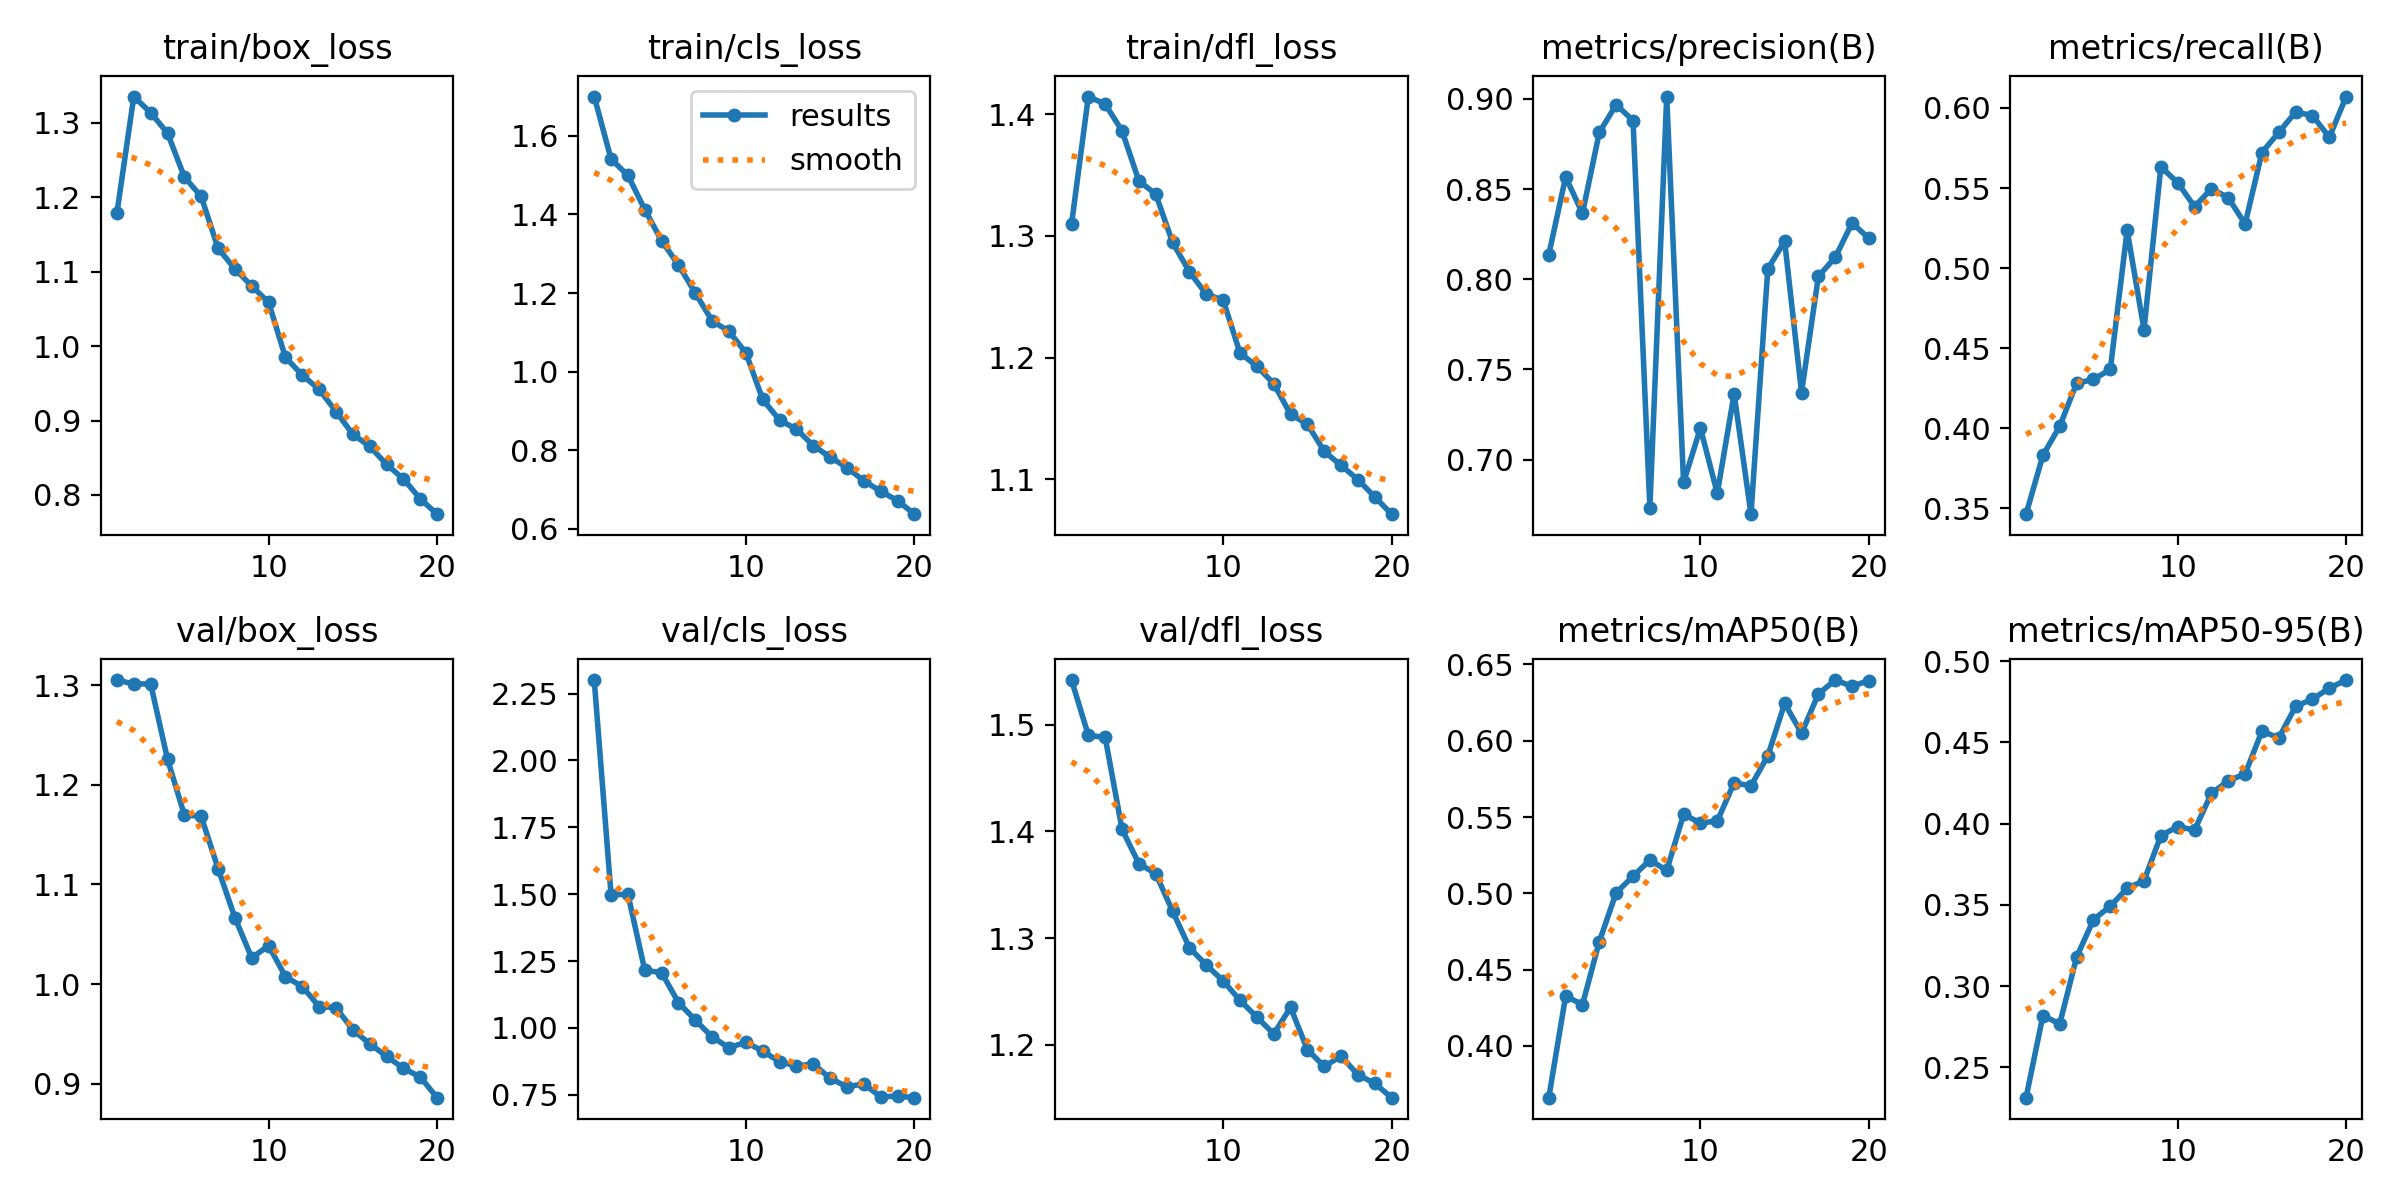

In [ ]:
%cd /content
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


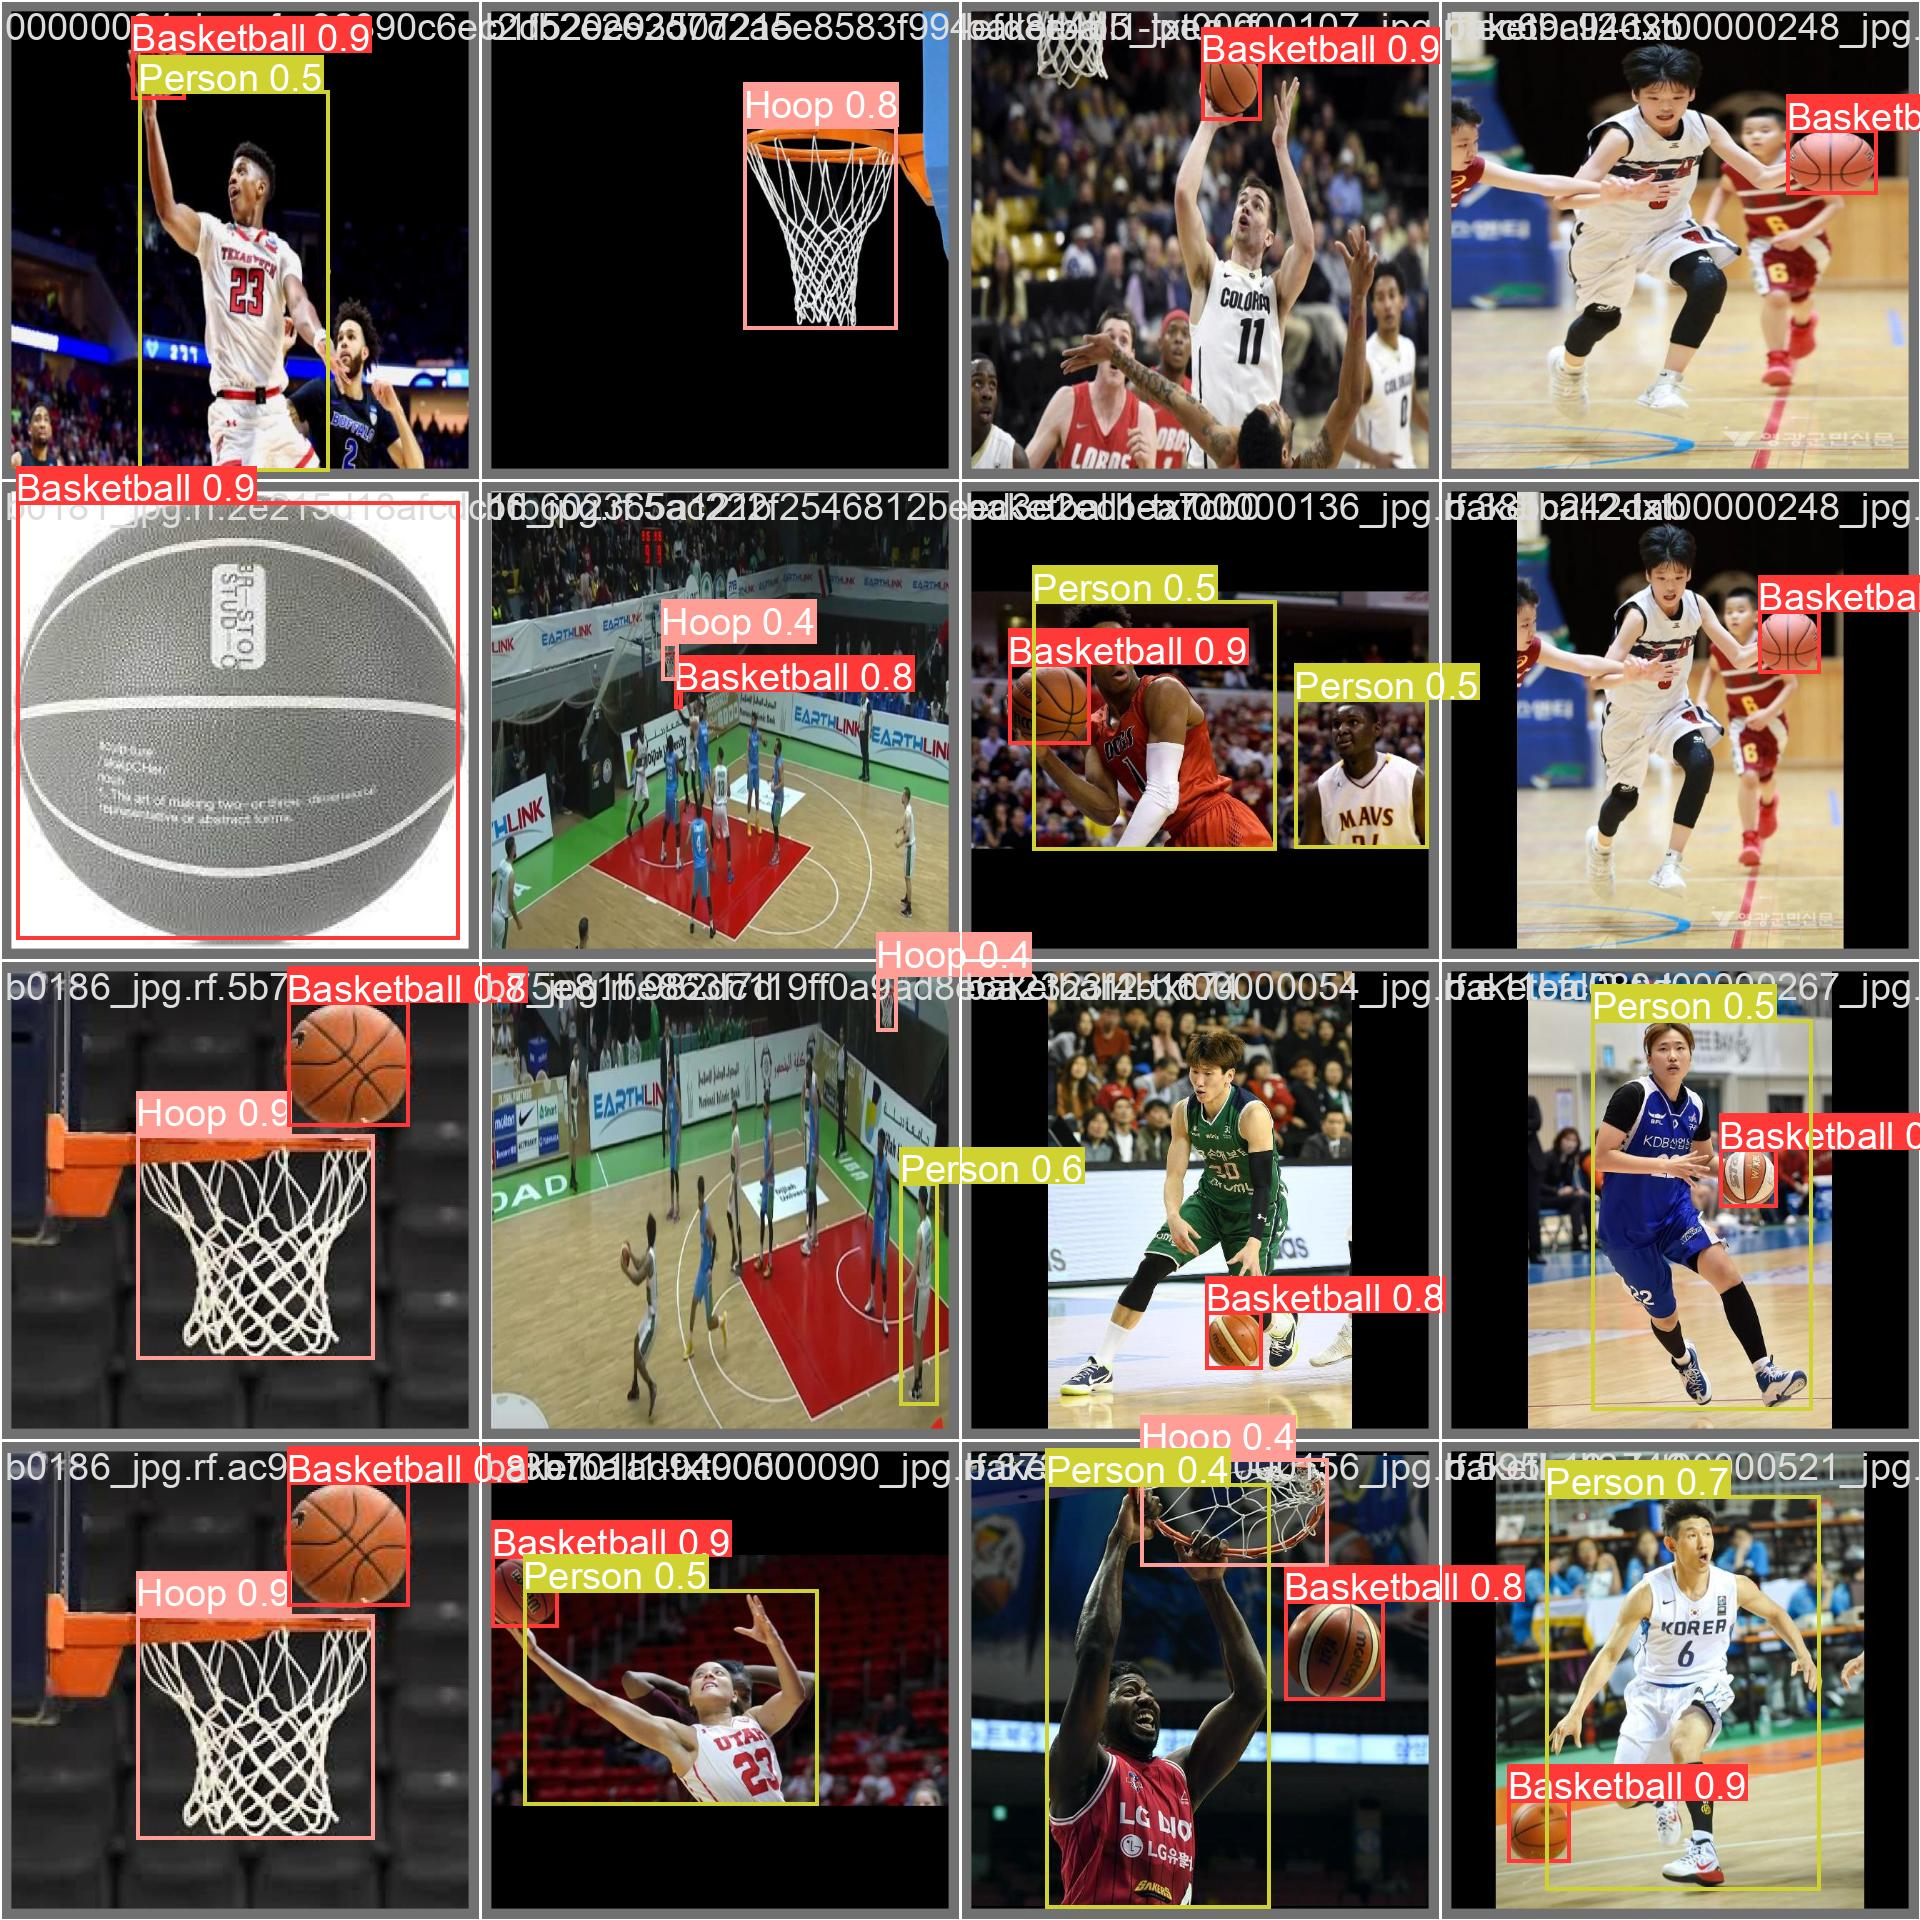

In [ ]:
%cd /content
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
#Validate Custom Model

%cd /content
#adjust the model path to ensure it's in the latest train since it seems to be adding train folders
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Warriors-vs-Cavs-2016-10/valid/labels.cache... 2536 images, 1 backgrounds, 0 corrupt: 100% 2536/2536 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Warriors-vs-Cavs-2016-10/valid/images/youtube-3_jpg.rf.b8b03b1089305bc25b06e55ac3bd115f.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 39, len(boxes) = 7115. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 159/159 [01:05<00:00,  2.41it/s]
                   all       2536       7115      0.826      0.606       0.64      0.489
            Basketball       2536       2268   

In [ ]:
!pip install yt_dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.7 MB/s eta 0:00:00


In [ ]:
#load in data to be inferenced on
import yt_dlp

# List of YouTube video URLs you want to download
video_urls = [
    'https://youtu.be/5zPxyWLls98?si=Bgew802YkfwJOC9T'
    #'https://www.youtube.com/watch?v=BhVz5eoxpaw'
    #,'https://youtu.be/X-N9MEWYN8w'
]

# Replace with your desired output directory
output_path = '/content/Youtube_video/'

# Options for yt_dlp (YouTube Downloader)
ydl_opts = {
    'format': 'best',  # Select the best available format
    'outtmpl': output_path + '%(title)s.%(ext)s',  # Output file template
    'quiet': True,  # Suppress output messages
}

# Lists to store successful and failed download URLs
failed_downloads = []
successful_downloads = []

# Initialize YouTube Downloader with the provided options
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    for url in video_urls:
        try:
            ydl.download([url])  # Download the video
            print("Downloaded:", url)
            successful_downloads.append(url)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
            failed_downloads.append(url)

# Print results
print("\n" * 4)
print("Failed downloads:", failed_downloads)
print("Successful downloads:", successful_downloads)


ERROR: [youtube] 5zPxyWLls98: 5zPxyWLls98: Failed to parse JSON (caused by JSONDecodeError("Expecting value in '': line 1 column 1 (char 0)")); please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://youtu.be/5zPxyWLls98?si=Bgew802YkfwJOC9T: ERROR: [youtube] 5zPxyWLls98: 5zPxyWLls98: Failed to parse JSON (caused by JSONDecodeError("Expecting value in '': line 1 column 1 (char 0)")); please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U





Failed downloads: ['https://youtu.be/5zPxyWLls98?si=Bgew802YkfwJOC9T']
Successful downloads: []


In [ ]:
#inference with Custom Model
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/1093 /content/Warriors-vs-Cavs-2016-10/test/images/0007_jpg.rf.550f88bd0f0c7303cd76294b278946fc.jpg: 640x640 1 Hoop, 49.8ms
image 2/1093 /content/Warriors-vs-Cavs-2016-10/test/images/000837_jpg.rf.8de554923a390a842c11db1b8aadf12e.jpg: 640x640 1 Basketball, 38.9ms
image 3/1093 /content/Warriors-vs-Cavs-2016-10/test/images/001203_jpg.rf.0a323653ab1c6670f6a5408d857ecf4d.jpg: 640x640 1 Basketball, 48.9ms
image 4/1093 /content/Warriors-vs-Cavs-2016-10/test/images/001404_jpg.rf.97e32074639a3c4b556a539f36e56cf0.jpg: 640x640 1 Basketball, 1 Hoop, 37.1ms
image 5/1093 /content/Warriors-vs-Cavs-2016-10/test/images/0014_jpg.rf.3ffa30f2b739361ab40d4c591a6f841d.jpg: 640x640 1 Basketball, 37.1ms
image 6/1093 /content/Warriors-vs-Cavs-2016-10/test/images/001636_jpg.rf.208308ead9fb4edd04d0fde783268103.jpg: 640x640 1 Ba

In [ ]:
%cd /content
!yolo task=track mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/Youtube_video' save=True

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 401, in entrypoint
    raise ValueError(f"Invalid 'task={task}'. Valid tasks are {TASKS}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'task=track'. Valid tasks are ('detect', 'segment', 'classify', 'pose').

    Arguments received: ['yolo', 'task=track', 'mode=predict', 'model=/content/runs/detect/train/weights/best.pt', 'conf=0.25', 'source=/content/Youtube_video', 'save=True']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS 

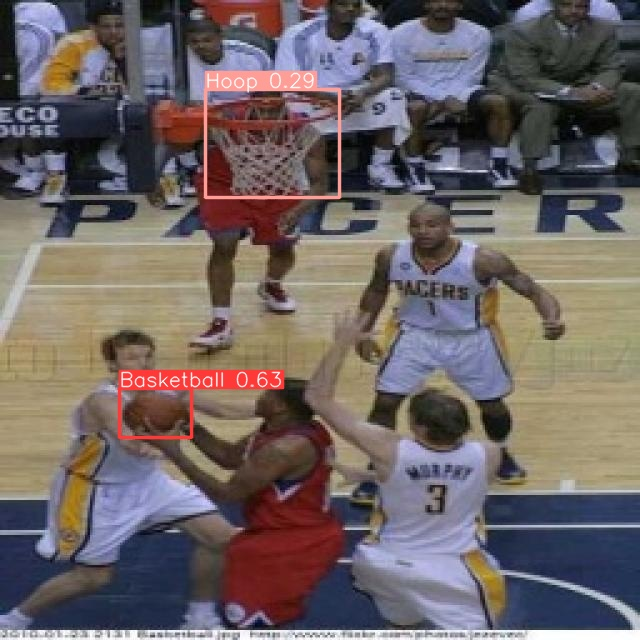

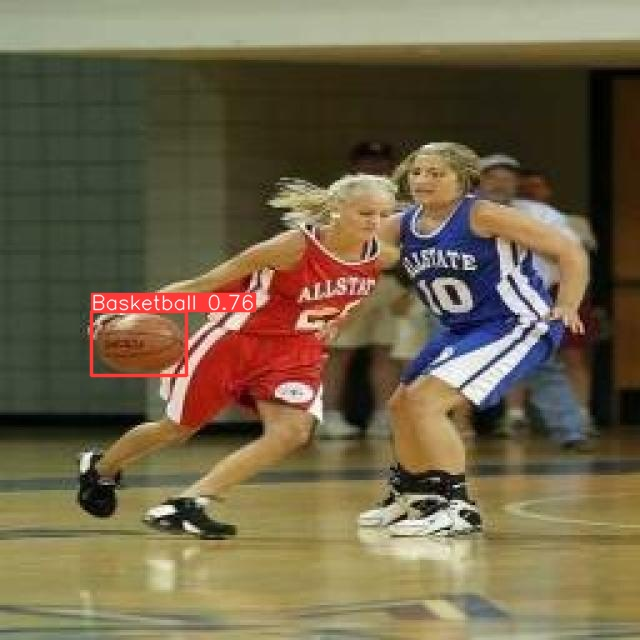

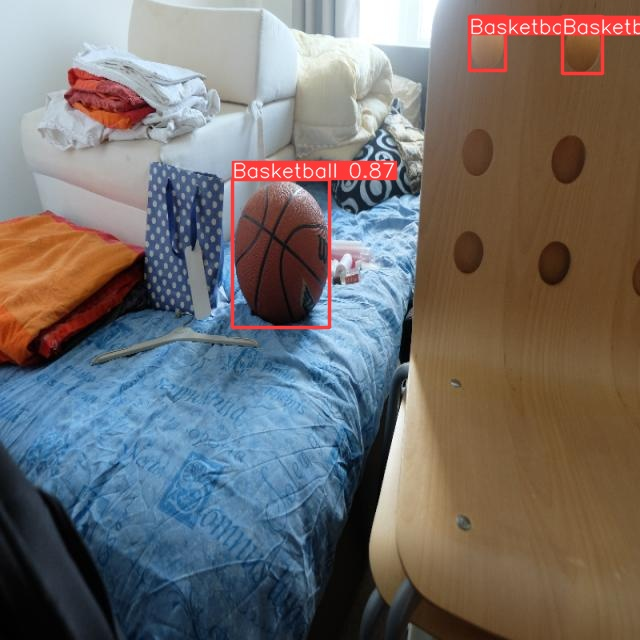

In [ ]:
#Visualize some results
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!apt-get -qq install ffmpeg


In [ ]:
!ffmpeg -i "/content/runs/detect/predict2/Top 10 Plays From The Cavaliers and Warriors NBA Finals Trilogy!.avi" "/content/runs/detect/predict2/Top 10 Plays From The Cavaliers and Warriors NBA Finals Trilogy!.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#extract an image once every 1000 frames to be able to display
!mkdir /content/runs/detect/predict2/frames
!ffmpeg -i "/content/runs/detect/predict2/Top 10 Plays From The Cavaliers and Warriors NBA Finals Trilogy!.mp4" -vf "select=not(mod(n\,1000))" -vsync vfr /content/runs/detect/predict2/frames/%04d.png


mkdir: cannot create directory ‘/content/runs/detect/predict2/frames’: No such file or directory
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --e

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import os

# Get all extracted frames
frames_path = "/content/runs/detect/predict/"
frames = [os.path.join(frames_path, f) for f in os.listdir(frames_path) if f.endswith('.png')]

# Display each frame
for frame in frames:
    img = plt.imread(frame)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()


In [ ]:
from IPython.display import Video

video_path = "/content/runs/detect/predict/Top 10 Plays From The Cavaliers and Warriors NBA Finals Trilogy!.mp4"
Video(video_path)


ValueError: ignored

In [ ]:
from IPython.display import display, HTML

def play_video(video_path):
    video_html = f"""
    <video width="600" controls>
      <source src="{video_path}" type="video/avi">
    </video>
    """
    display(HTML(video_html))

# Assuming your video path is '/content/runs/detect/predict/video_name.avi'
video_path = "/content/runs/detect/predict/Top 10 Plays From The Cavaliers and Warriors NBA Finals Trilogy!.mp4"
play_video(video_path)
